### In this task you will need to predict student performance based on different characteristics with K-NN


In [1]:
%pylab inline
%precision 6

Populating the interactive namespace from numpy and matplotlib


'%.6f'

In [2]:
import sklearn
import sklearn as skl
import pandas as pd
from pdb import set_trace as bp
import numpy as np

In [3]:
np.set_printoptions(linewidth=140,edgeitems=10)
rcParams['figure.figsize'] = (8.0, 5.0)

In [5]:
# you need to download module common from github.com/Apogentus/common and add it to your PythonPath system variable
from common.classes.Struct import Struct
from common.visualize.colors import COLORS
from common.visualize.distributions import cross_distributions, cross_distributions_classification, cross_distributions_regression

#### Load and prepare data

In [6]:
Z=pd.read_csv('data.csv')

In [7]:
Z.head()

,Gender,Nationality,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,RaisedHands,VisitedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentSchoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


#### Make structure with feature groups

In [8]:
F=Struct()
F.numeric = 'VisitedResources AnnouncementsView Discussion'.split()
F.categorical = 'Gender Nationality PlaceofBirth StageID GradeID SectionID Topic Semester \
                        Relation ParentAnsweringSurvey ParentSchoolSatisfaction StudentAbsenceDays'.split()

#### Random shuffling

In [9]:
random.seed(0)
inds = random.permutation(arange(len(Z)))

Z=Z.loc[inds]

Z.index = arange(len(Z))

In [10]:
Z.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            470, 471, 472, 473, 474, 475, 476, 477, 478, 479],
           dtype='int64', length=480)

In [11]:
len(Z)

480

In [12]:
classes = unique(Z['Class'])
classes

array(['H', 'L', 'M'], dtype=object)

In [13]:
Z['Class'].value_counts()

M    211
H    142
L    127
Name: Class, dtype: int64

In [14]:
Z[F.numeric] = Z[F.numeric].astype(float)

#### Form array X to consist of only NUMERIC variables and array Y of outputs.

In [15]:
X = Z[F.numeric].values
Y = Z['Class'].values

In [16]:
X.dtype

dtype('float64')

In [17]:
X.shape

(480, 3)

#### Using *cross_distributions_classification* plot all pairwise feature distrubutions of features and Y. 

In [18]:
[F.numeric]

[['VisitedResources', 'AnnouncementsView', 'Discussion']]

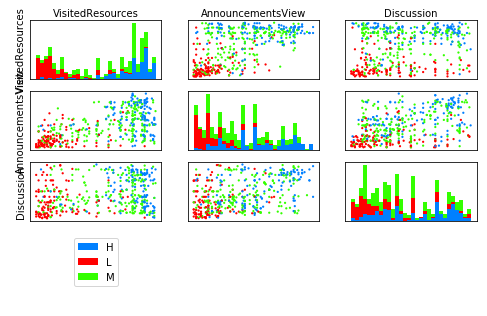

In [19]:
cross_distributions_classification(X, Y, var_names=F.numeric)

#### What relatonships between features and Y can you see?

- Those who visit resources more often receive higher grades

#### Project the *numeric* features onto 2 principal components and plot. Show Y values with color. 
* Don't forget to normalize data passed to PCA with sklearn.preprocessing.StandardScaler

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [21]:
scaler = StandardScaler()
scaler.fit(X, Y)
norm_X = scaler.transform(X)

In [22]:
pca = PCA(n_components=2)

In [23]:
pca.fit(X)
Z_train = pca.transform(X) 
color_list = {'H' : 'r', 'M' : 'b', 'L' : 'g'}

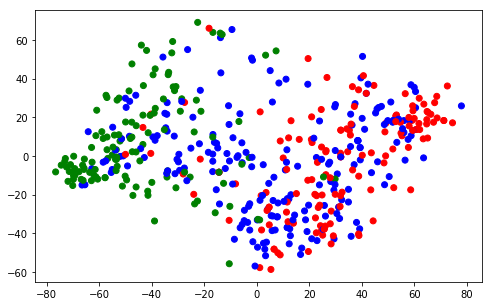

In [24]:
scatter(Z_train[:,0], Z_train[:,1], c=[color_list[y] for y in Y])

#### Can classes be easily separated in this 2D space?

No, red and blue point's distribution is to too complex to perform separation

#### Plot variance explained by each of the components

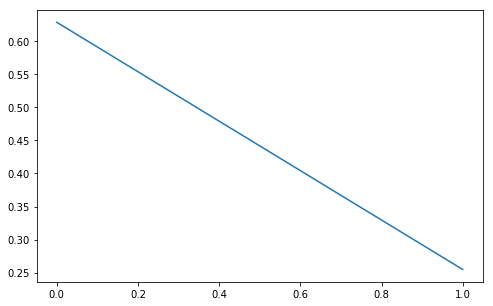

In [25]:
plot(pca.explained_variance_ratio_)

#### Get best cross-validation score by varying n_neighbors=[1,3,5,7,11, 16, 25, 51]
* Use sklearn.model_selection.GridSearchCV to find the classifier clf with best parameters 
* Print clf.best\_score_, clf.best\_params_

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [27]:
%%time
params = {'n_neighbors' : [1,3,5,7,11, 16, 25, 51] }

clf = GridSearchCV(KNeighborsClassifier(), params)
clf.fit(norm_X, Y)
print('Best score: ', clf.best_score_, 
      'Best params: ', clf.best_params_)

Best score:  0.6145833333333334 Best params:  {'n_neighbors': 16}
CPU times: user 148 ms, sys: 0 ns, total: 148 ms
Wall time: 147 ms


#### Calculate standard deviations of numeric features. Do they have equal spread?

In [28]:
for i in range(3):
    print(np.std(X[:,i]))

33.04553039358054
26.58350958340214
27.608930720974246


No, not equal.

#### Normalize numeric features with sklearn.preprocessing.StandardScaler

#### For NORMALIZED numeic features get best cross-validation score by varying n_neighbors=[1,3,5,7,11, 16, 25, 51]
* Use sklearn.model_selection.GridSearchCV to find the classifier clf with best parameters 
* Print clf.best\_score_ clf.best\_params_

#### Try optimizing weights in ['uniform','distance']

#### Try additionally optimize parameter p in [1,2,3,4,5,7]

#### Report overall best model cross-validation score and best model parameters for numeric features

In [30]:
params = {'n_neighbors' : [1,3,5,7,11, 16, 25, 51],
          'weights' : ['uniform','distance'],
          'p' : [1,2,3,4,5,7]}

clf = GridSearchCV(KNeighborsClassifier(), params)
clf.fit(norm_X,Y)
print('Best score: ', clf.best_score_, 
      'Best params: ', clf.best_params_)

Best score:  0.6416666666666667 Best params:  {'n_neighbors': 51, 'p': 2, 'weights': 'distance'}


# Adding categorical features

#### Calculate *sklearn.metrics.normalized_mutual_info_score* to find 3 categorical variables mostly connected with output. 

In [31]:
s = pd.Series()

for c in F.categorical:
    s.set_value(c, 
                sklearn.metrics.normalized_mutual_info_score(Z[c], Y))

#### What are those features? Explain.

In [32]:
s.sort_values(ascending=False).head(3)

StudentAbsenceDays       0.324328
ParentAnsweringSurvey    0.121549
Relation                 0.102530
dtype: float64

#### Add one-hot-encoded categorical features to Z

In [33]:
from common.feature_transformations import get_one_hot_encoding

In [34]:
F.categorical_one_hot = []
for col in F.categorical:
    print('Making one-hot-encoding of %s'%col)
    feature_one_hot = get_one_hot_encoding(Z[col])
    Z = pd.concat([Z, feature_one_hot],axis=1)
    F.categorical_one_hot += list(feature_one_hot.columns)

Making one-hot-encoding of Gender
Making one-hot-encoding of Nationality
Making one-hot-encoding of PlaceofBirth
Making one-hot-encoding of StageID
Making one-hot-encoding of GradeID
Making one-hot-encoding of SectionID
Making one-hot-encoding of Topic
Making one-hot-encoding of Semester
Making one-hot-encoding of Relation
Making one-hot-encoding of ParentAnsweringSurvey
Making one-hot-encoding of ParentSchoolSatisfaction
Making one-hot-encoding of StudentAbsenceDays


In [35]:
Z.head()

,Gender,Nationality,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,RaisedHands,...,Semester=F,Semester=S,Relation=Father,Relation=Mum,ParentAnsweringSurvey=No,ParentAnsweringSurvey=Yes,ParentSchoolSatisfaction=Bad,ParentSchoolSatisfaction=Good,StudentAbsenceDays=Above-7,StudentAbsenceDays=Under-7
0,F,KW,KuwaIT,MiddleSchool,G-06,A,IT,F,Father,30,...,1,0,1,0,0,1,0,1,0,1
1,M,KW,KuwaIT,lowerlevel,G-02,C,IT,F,Father,0,...,1,0,1,0,0,1,1,0,0,1
2,M,Tunis,Tunis,MiddleSchool,G-07,A,Quran,S,Father,19,...,0,1,1,0,1,0,1,0,1,0
3,M,Egypt,Egypt,lowerlevel,G-04,A,Math,S,Mum,49,...,0,1,0,1,1,0,1,0,1,0
4,M,KW,KuwaIT,lowerlevel,G-02,B,French,S,Father,40,...,0,1,1,0,0,1,0,1,0,1


In [36]:
Z.columns

Index(['Gender', 'Nationality', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'RaisedHands',
       'VisitedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentSchoolSatisfaction',
       'StudentAbsenceDays', 'Class', 'Gender=F', 'Gender=M',
       'Nationality=Egypt', 'Nationality=Iran', 'Nationality=Iraq',
       'Nationality=Jordan', 'Nationality=KW', 'Nationality=Lybia',
       'Nationality=Morocco', 'Nationality=Palestine',
       'Nationality=SaudiArabia', 'Nationality=Syria', 'Nationality=Tunis',
       'Nationality=USA', 'Nationality=lebanon', 'Nationality=venzuela',
       'PlaceofBirth=Egypt', 'PlaceofBirth=Iran', 'PlaceofBirth=Iraq',
       'PlaceofBirth=Jordan', 'PlaceofBirth=KuwaIT', 'PlaceofBirth=Lybia',
       'PlaceofBirth=Morocco', 'PlaceofBirth=Palestine',
       'PlaceofBirth=SaudiArabia', 'PlaceofBirth=Syria', 'PlaceofBirth=Tunis',
       'PlaceofBirth=USA', 'PlaceofBirth=lebanon', 'Plac

#### Add one most significant categorical feature (in one-hot-encoded representation) to X 
* don't forget to standardize numeric features to zero mean, unit variance

In [37]:
s = pd.Series()

for c in Z.columns:
    s.set_value(c, 
                sklearn.metrics.normalized_mutual_info_score(Z[c], Y))
    
s.sort_values(ascending=False).head(5)

Class                         1.000000
StudentAbsenceDays=Under-7    0.324328
StudentAbsenceDays=Above-7    0.324328
StudentAbsenceDays            0.324328
VisitedResources              0.214643
dtype: float64

In [38]:
new_X = hstack((norm_X, Z[['StudentAbsenceDays=Under-7', 'StudentAbsenceDays=Above-7']]))

#### Make optimization over n_neighbors, weights, p. Did the quality improve?

In [39]:
n_neighbors=[1,3,5,7,11, 16, 25, 51]
params = {'n_neighbors' : [1,3,5,7,11, 16, 25, 51],
          'weights' : ['uniform','distance'],
          'p' : [1,2,3,4,5,7]}

In [40]:
clf = GridSearchCV(KNeighborsClassifier(), params)
clf.fit(new_X,Y)
print('Best score: ', clf.best_score_, 
      'Best params: ', clf.best_params_)

Best score:  0.7333333333333333 Best params:  {'n_neighbors': 25, 'p': 1, 'weights': 'distance'}


#### Add several most significant categorical features (in one-hot-encoded representation) to X 


In [41]:
newest_X = hstack((new_X, Z[['ParentAnsweringSurvey=No', 'ParentAnsweringSurvey=Yes', 'Relation=Father', 'Relation=Mum']]))

In [42]:
clf = GridSearchCV(KNeighborsClassifier(), params)
clf.fit(newest_X,Y)
print('Best score: ', clf.best_score_, 
      'Best params: ', clf.best_params_)

Best score:  0.7541666666666667 Best params:  {'n_neighbors': 25, 'p': 1, 'weights': 'distance'}


In [43]:
newest_X

array([[-0.447804, -0.59882 ,  0.822801,  1.      ,  0.      ,  0.      ,  1.      ,  1.      ,  0.      ],
       [-1.476687, -1.275932, -1.024427,  1.      ,  0.      ,  0.      ,  1.      ,  1.      ,  0.      ],
       [ 0.308728,  0.454464, -1.205528,  0.      ,  1.      ,  1.      ,  0.      ,  1.      ,  0.      ],
       [ 1.186305,  0.153526, -1.314188,  0.      ,  1.      ,  1.      ,  0.      ,  0.      ,  1.      ],
       [ 0.217944,  1.695835, -0.372464,  1.      ,  0.      ,  0.      ,  1.      ,  1.      ,  0.      ],
       [ 0.611341,  0.642551, -1.169308,  1.      ,  0.      ,  0.      ,  1.      ,  1.      ,  0.      ],
       [ 1.125783,  1.921539,  1.438544,  1.      ,  0.      ,  0.      ,  1.      ,  1.      ,  0.      ],
       [-1.597732, -1.087845,  0.207059,  0.      ,  1.      ,  1.      ,  0.      ,  1.      ,  0.      ],
       [-0.8412  , -1.426401,  0.931462,  0.      ,  1.      ,  1.      ,  0.      ,  1.      ,  0.      ],
       [-1.29512 , -1.275932

#### Specify your own distance function to K-NN, calculating $L_1$ normed distance. Numeric features there should be added with weights 1 and one-hot encoded features should be added with custom constant weight w.

In [44]:
def L1_normed(x, y, p =0.5):
    _sum = 0
    for i in range(3):
        _sum += abs(x[i] - y[i])
    for i in range(3, len(x)):
        _sum += p * abs(x[i] - y[i])
    return _sum

params = {'n_neighbors' : [1,3,5,7,11, 16, 25, 51],
          'weights' : ['uniform','distance'],
          'metric_params' : [{'p' : 0.05*i+0.05} for i in range(40)]}

In [45]:
clf = GridSearchCV(KNeighborsClassifier(metric=L1_normed), params)

In [ ]:
%%time

clf.fit(newest_X,Y)
print('Best score: ', clf.best_score_, 
      'Best params: ', clf.best_params_)

#### Finetune K-NN with your custom distance function by it's major parameters and w optimization. Report CV accuracy and best parameters.

### Free hunt for bonus points: make whatever additional experiments you like to explore the data or improve the quality and report interesting findings.

In [ ]:
groupedByGenderCount = Z.groupby('Gender').count()
males = groupedByGenderCount.loc['M']['Nationality']
females = groupedByGenderCount.loc['F']['Nationality']
print('Percent of males: ', males/(females + males))

In [ ]:
groupedByGenderSum = Z.groupby('Gender').sum()
groupedByGenderSum

In [ ]:
male_hands = groupedByGenderSum.loc['M']['RaisedHands']
female_hands = groupedByGenderSum.loc['F']['RaisedHands']
print('Percent of male\'s raised hands: ', male_hands / (male_hands + fe))